<h1 align="center"> 
Intro to Machine Learning: Supervised Learning
</h1> 

<h3 align="center"> 
Classifcation Guided Problem: Model Comparrison Using Breast Cancer Data
</h3> 

### Brief Description of Data Set 
Title: Wisconsin Diagnostic Breast Cancer (WDBC)

Creators: 
	
    Dr. William H. Wolberg, General Surgery Dept., University of
	Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu

	W. Nick Street, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	street@cs.wisc.edu  608-262-6619

	Olvi L. Mangasarian, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	olvi@cs.wisc.edu 

Donor: Nick Street

Date: November 1995


## Import Basic Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read and Assign Breast Cancer Data

The original dataset has extremly long feature names so let's simplify them to simplify our analysis

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',
                header=None,
                names=['id', 'diagnosis', 'radius_mean', 'texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave_points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst'])
# Show the first five rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The goal for this project is just to look at the effects of the features in relation to the diagnosis. With that being said, the "standard error" and "worst" columns will be omitted. This ensures that the model is not overcounting.

In [6]:
df.drop(['id','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave_points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst'], 
        axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


## Encode Class Label

We have two types of target classes: Benign('B') and Malignant('M')

Since the model cannot injest string values, let's convert these classes to unique numeric values {'B': 0, 'M':1}

First create the mapping then apply that mapping across the entire 'diagnosis' column

*Keep in mind this is only one of many different approachsto label encoding. This approach is just a general approach in case there are more labels we are not aware of*

In [7]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['diagnosis']))}
class_mapping

{'B': 0, 'M': 1}

In [8]:
df['diagnosis'] = df['diagnosis'].map(class_mapping)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


## Visualize Correlations Between Features

Next, let's see the distributions for each continuous variable AND how they relate to one another

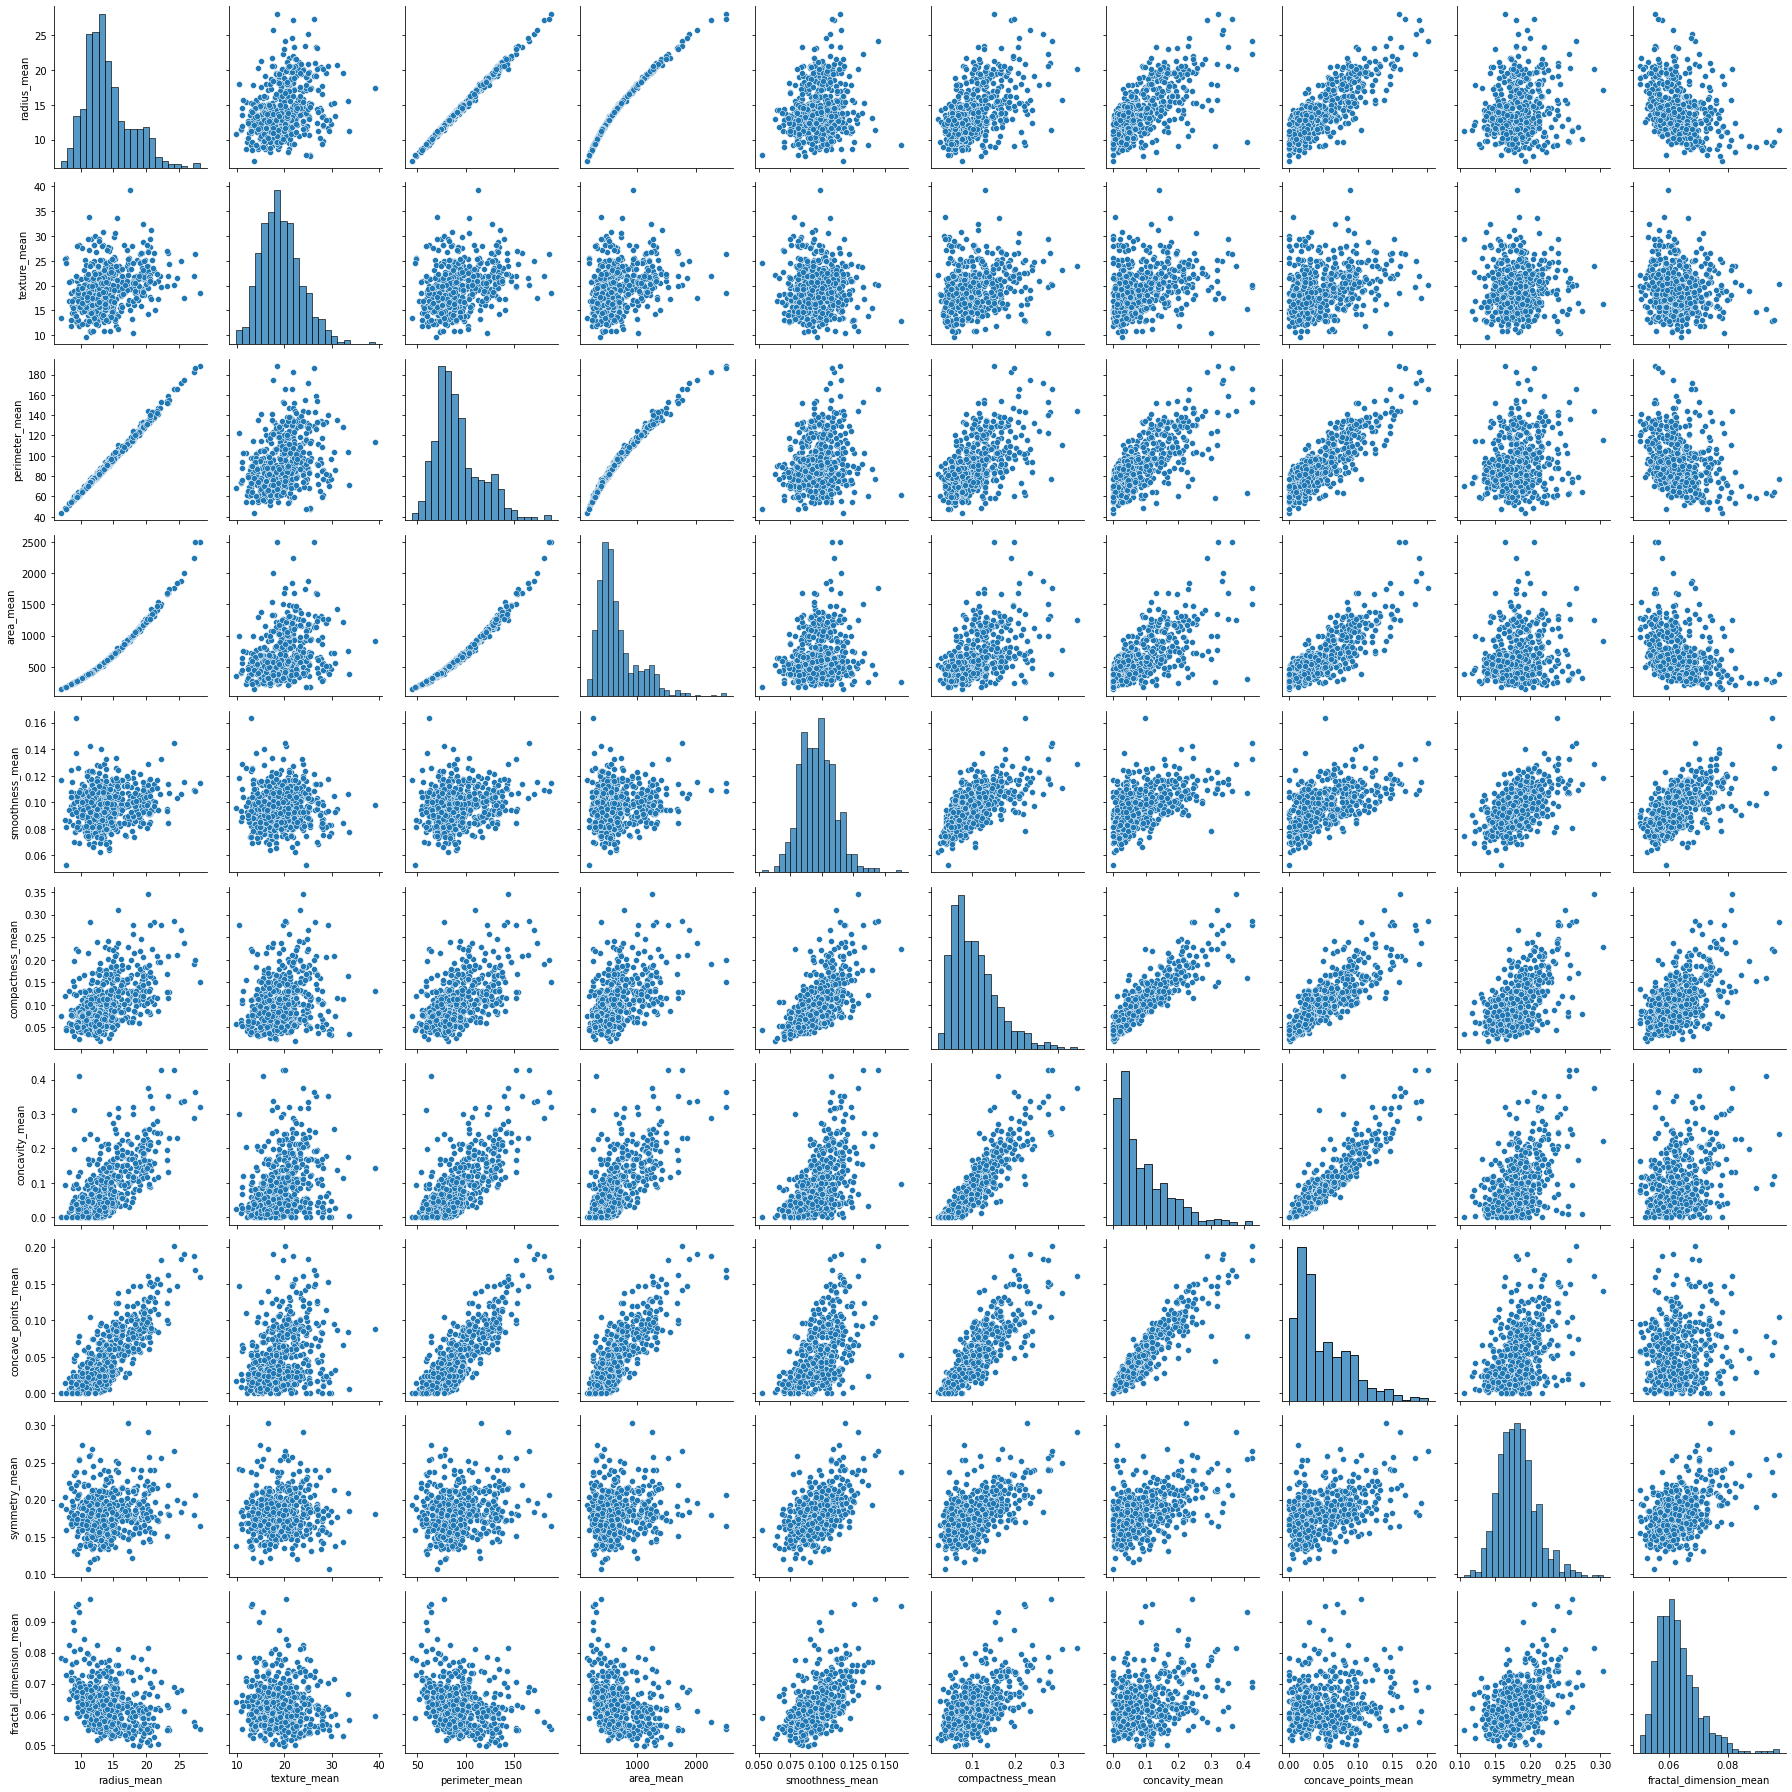

In [10]:
cols = ['radius_mean', 'texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean']

sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()

As you can see, there are some pretty strong correlations between radius, perimeter, and area since the area and perimeter use radius in their calculation

In a proper ML application, we may have to remove area and perimeter to eliminate any trace of **multicollinearity**

Let's take a deeper look at the actual correlation values between each of these variables using a correlation heatmap

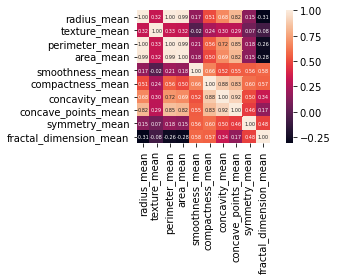

In [11]:
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 5},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
plt.show()

As you can see there is a correlation coefficient of 1.00 and 0.99 between radius-perimeter and radius-area respectivly

Let's remove these variables to eliminate overrepresentation of the radius

In [12]:
df.drop(['perimeter_mean','area_mean'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


## Preprocess Data

Now it's time to prep our data for our classification model. Since most of the cleaning was performed in the previous steps, all we have to to is split our dataset into Train and Test sets. The Train set is how the model learns the features space, and the Test set evaluates the model's overall performance. Based on standard practice, the Test set is 20%-30% of the original dataset. However it's importnat for you to understand the quantity and distribution of you data before you decide to create Train and Test sets. 

In [13]:
# Extract variable values without the target class
variables = df.iloc[:, 1:].values

# Isolate the target class
target = df.diagnosis.values

In [14]:
from sklearn.model_selection import train_test_split

# Randomly set aside 20% of the data to be used for testing
var_train, var_test, target_train, target_test = train_test_split(variables, target, test_size=0.2, random_state=0, stratify=target)

In [16]:
print('Variable train set size: ',var_train.shape)
print('Variable test set size: ',var_test.shape)

Variable train set size:  (455, 8)
Variable test set size:  (114, 8)


## Logistic Regression Classifier 

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression(random_state=0)
lr.fit(var_train, target_train)

LogisticRegression(random_state=0)

In [20]:
#Test the model
lr_prediction = lr.predict(var_test)
lr_prediction

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0], dtype=int64)

### Error Analysis

In [43]:
from sklearn.metrics import f1_score, accuracy_score
lr_accuracy = accuracy_score(target_test, lr_prediction)
lr_fscore = f1_score(target_test, lr_prediction, average='macro')
print('LR Accuracy: ', lr_accuracy)
print('LR F1 Score: ', lr_fscore)

LR Accuracy:  0.9473684210526315
LR F1 Score:  0.9434523809523809


<function matplotlib.pyplot.show(close=None, block=None)>

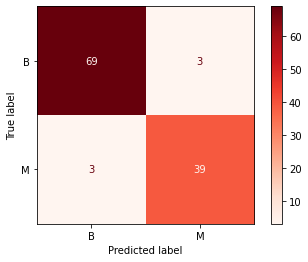

In [35]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(lr, var_test, target_test,
                                 display_labels=class_mapping,
                                 cmap=plt.cm.Reds)
plt.show

## Decison Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dtree = DecisionTreeClassifier(random_state = 0)
dtree.fit(var_train, target_train)

DecisionTreeClassifier(random_state=0)

In [42]:
dtree_predictions = dtree.predict(var_test)

In [46]:
dtree_accuracy = accuracy_score(target_test, dtree_predictions)
dtree_fscore = f1_score(target_test, dtree_predictions, average='macro')
print('DTree Accuracy: ', dtree_accuracy)
print('DTree F1 Score: ', dtree_fscore)

DTree Accuracy:  0.9122807017543859
DTree F1 Score:  0.9088874680306905


Unlike Accuracy, F1-score takes into account the Prescision and Recall of the model. Prescision is the fraction of relevant instances among the retrieved instances, and Recall is the fraction of retrieved relevant instances among all relevant instances.

### Visualize Decision Tree

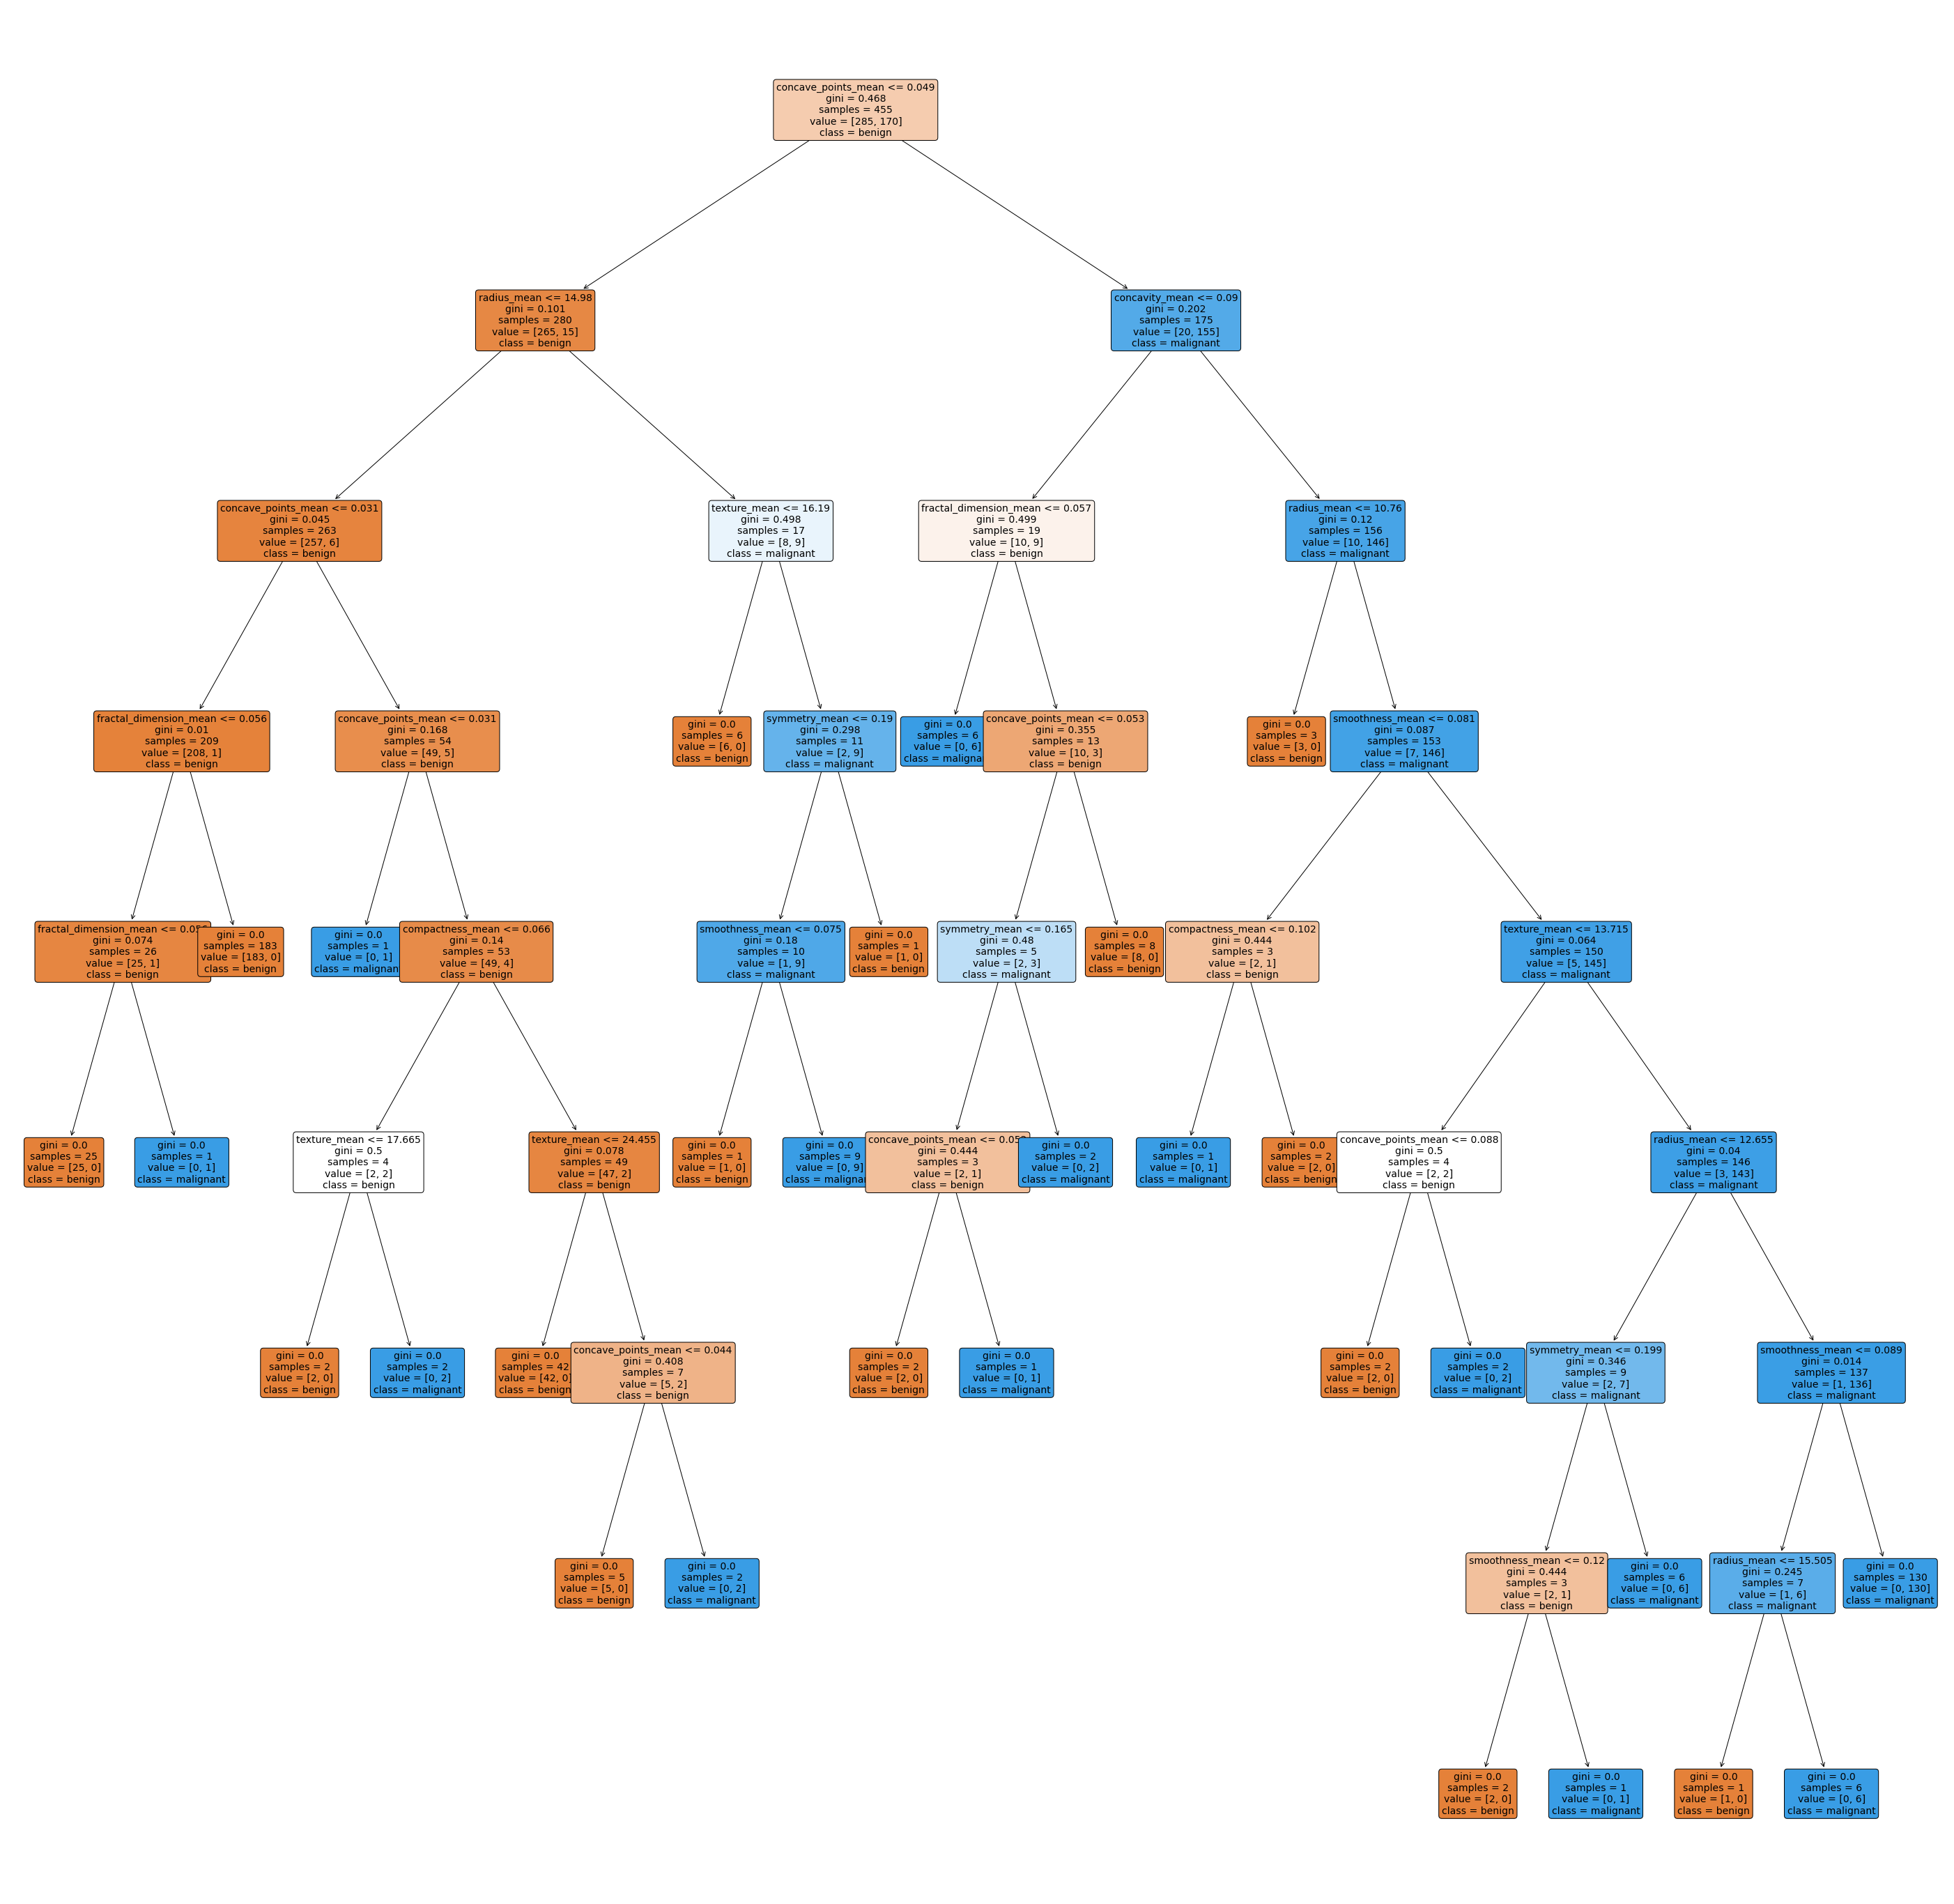

In [54]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
a = plot_tree(dtree, 
              feature_names=['radius_mean', 'texture_mean','smoothness_mean','compactness_mean',
                             'concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean'], 
              class_names=['benign','malignant'], 
              filled=True, 
              rounded=True, 
              fontsize=14)
plt.show()

## Random Forest Classification

In [56]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(var_train, target_train)
forest_predictions = forest.predict(var_test)

forest_accuracy = accuracy_score(target_test, forest_predictions)
forest_fscore = f1_score(target_test, forest_predictions, average='macro')
print('Random Forest Accuracy: ', dtree_accuracy)
print('Random Forest F1 Score: ', dtree_fscore)

Random Forest Accuracy:  0.9122807017543859
Random Forest F1 Score:  0.9088874680306905


In [57]:
important = forest.feature_importances_
important

array([0.26975296, 0.05543212, 0.05584735, 0.10394224, 0.21246085,
       0.2373799 , 0.03086282, 0.03432176])

In [58]:
features = ['radius_mean', 'texture_mean','smoothness_mean','compactness_mean',
            'concavity_mean','concave_points_mean','symmetry_mean',
            'fractal_dimension_mean']

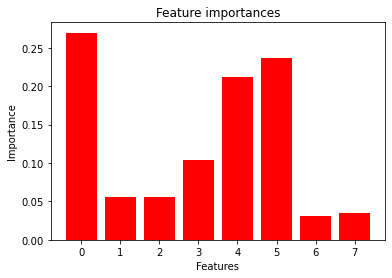

In [59]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(0,len(features)),important, color="r", align="center")
plt.xlabel('Features')
plt.ylabel("Importance")
plt.show()

In [63]:
print("----List of Features----")
for i in range(0,len(features)):
    line = 'X%d' %i + ': ' + features[i] + '= ' + str(round(important[i], 3))
    print(line)

----List of Features----
X0: radius_mean= 0.27
X1: texture_mean= 0.055
X2: smoothness_mean= 0.056
X3: compactness_mean= 0.104
X4: concavity_mean= 0.212
X5: concave_points_mean= 0.237
X6: symmetry_mean= 0.031
X7: fractal_dimension_mean= 0.034
